In [1]:
import zipfile
# Unzip the archive
local_zip = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\data\\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
import os
base_dir ='D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


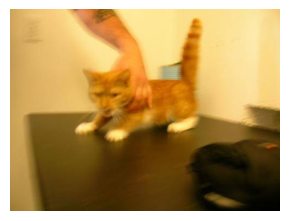

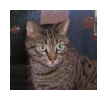

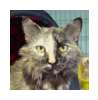

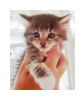

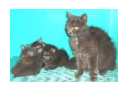

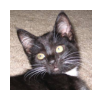

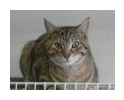

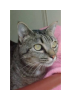

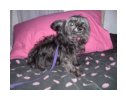

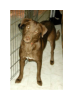

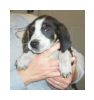

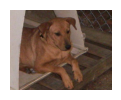

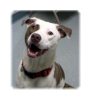

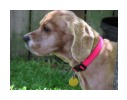

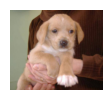

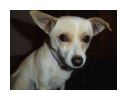

In [5]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)

for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 41s - 415ms/step - accuracy: 0.5225 - loss: 0.7554 - val_accuracy: 0.5100 - val_loss: 0.6818
Epoch 2/15
100/100 - 0s - 598us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 24s - 236ms/step - accuracy: 0.6035 - loss: 0.6699 - val_accuracy: 0.6250 - val_loss: 0.6640
Epoch 4/15
100/100 - 0s - 319us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
100/100 - 25s - 248ms/step - accuracy: 0.6685 - loss: 0.6066 - val_accuracy: 0.6530 - val_loss: 0.6110
Epoch 6/15
100/100 - 0s - 311us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
100/100 - 23s - 227ms/step - accuracy: 0.7285 - loss: 0.5289 - val_accuracy: 0.7390 - val_loss: 0.5367
Epoch 8/15
100/100 - 0s - 331us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
100/100 - 23s - 228ms/step - accuracy: 0.7860 - loss: 0.4796 - val_accuracy: 0.7100 - val_loss: 0.5597
Epoch 10/15
100/100 - 0s - 369us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/15
100/100 - 23s - 229ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_14280\3887320268.py:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_14280\3887320268.py:47: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


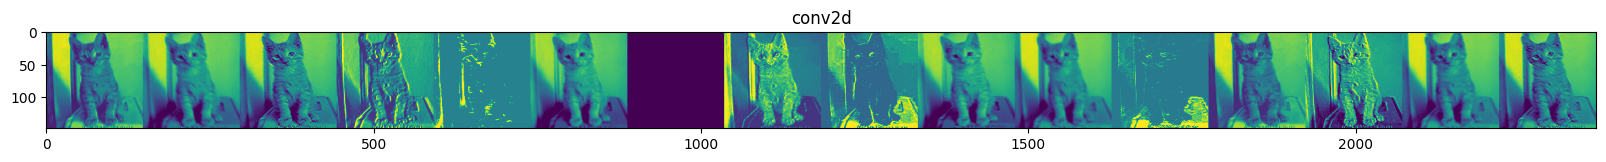

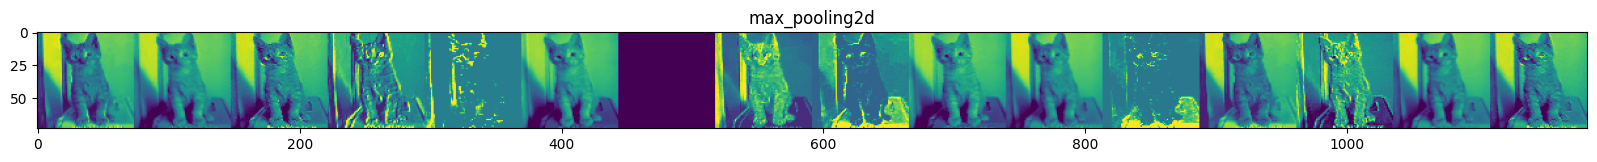

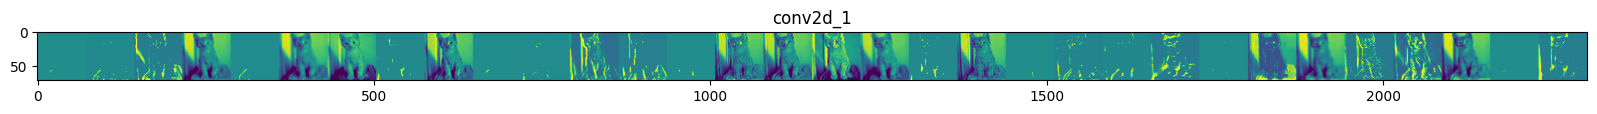

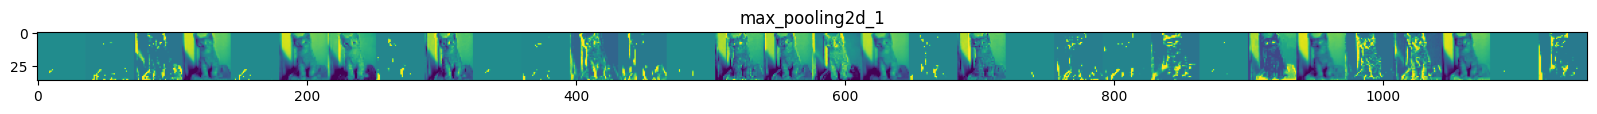

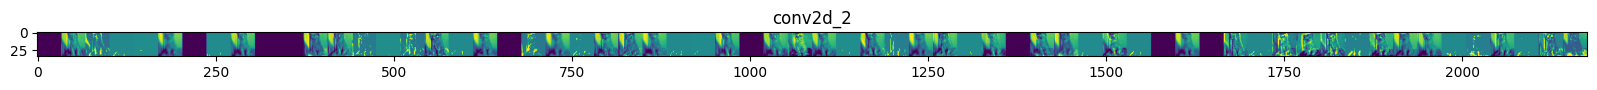

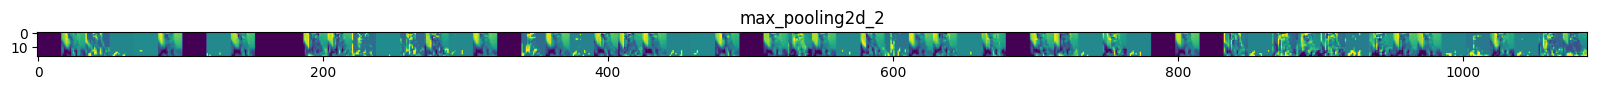

In [10]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.layers[0].input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
#uploaded=files.upload()
#for fn in uploaded.keys():
fn = '4.jpg' # change it to your image file
# predicting images
path='D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation\\dogs\\dog.2007.jpg' # change it to your image
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a dog" )
else:
    print(fn + " is a cat" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.67649066]
4.jpg is a dog


In [19]:
import numpy as np
from keras.preprocessing import image

# Đường dẫn tới thư mục chứa ảnh
image_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation' # Thay đổi đường dẫn tùy theo thư mục chứa ảnh

# List các tên file ảnh
image_files = ['dogs\\dog.2007.jpg', 'dogs\\dog.2010.jpg', 'dogs\\dog.2015.jpg', 'cats\\cat.2003.jpg', 'cats\\cat.2013.jpg', 'cats\\cat.2024.jpg']  # Thay đổi tên file tùy ý

# Duyệt qua từng tệp ảnh
for fn in image_files:
    # Đường dẫn đầy đủ đến ảnh
    path = os.path.join(image_dir, fn)
    
    # Load ảnh và resize về kích thước 150x150
    img = image.load_img(path, target_size=(150, 150))
    
    # Chuyển ảnh thành mảng numpy và chuẩn hóa
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    
    # Chồng các ảnh lại thành một mảng numpy
    images = np.vstack([x])
    
    # Dự đoán lớp của ảnh
    classes = model.predict(images, batch_size=10)
    
    # In ra kết quả dự đoán
    if classes[0]>0.5:
        print(fn + " is a dog" )
    else:
        print(fn + " is a cat" )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
dogs\dog.2007.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
dogs\dog.2010.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
dogs\dog.2015.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cats\cat.2003.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
cats\cat.2013.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
cats\cat.2024.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

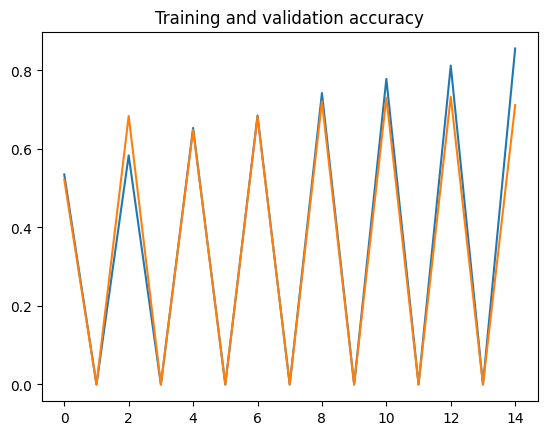

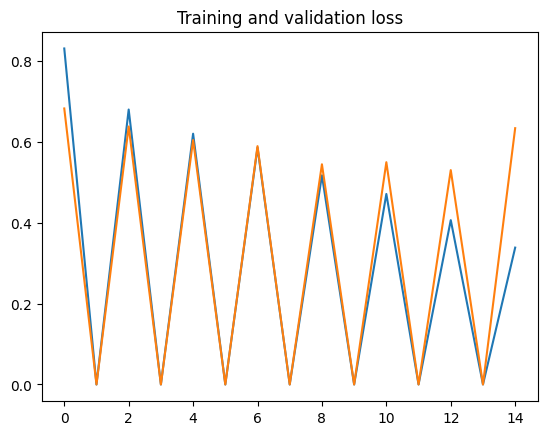

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

Accuracy và Loss Function:

Accuracy của tập training và validation có sự chênh lệch lớn, và loss function của tập validation cao hơn nhiều so với tập training. Điều này cho thấy mô hình đang gặp vấn đề về overfitting, tức là nó tập trung quá nhiều vào dữ liệu huấn luyện mà không tổng quát hóa được cho dữ liệu mới.
Sự giảm giá trị loss trên tập validation sau một số epoch đầu tiên:

Có thể là do mô hình đang học được một số mẫu từ dữ liệu huấn luyện và giảm loss function tạm thời, nhưng sau đó loss function lại tăng trở lại khi mô hình không thể áp dụng được hiệu quả lên dữ liệu mới.

Trong thư viện tensorflow.keras.layer có một loại layer là Dropout(rate = <rate_drop>), trong đó giá trị của
rate_drop  [0, 1). Layer Dropout cho phép bỏ bớt dữ liệu train với tỉ lệ là rate_drop, nhằm mục đích tránh
overfit. Hãy bổ sung các tầng Dropout này vào giữa các tầng Convolution, rate_drop khoảng từ 0.3 đến 0.5 và
quan sát kết quả sau khi thay đổi.

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Convolutional layers with Dropout
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(0.3),  # Add Dropout layer with rate_drop = 0.3
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Add Dropout layer with rate_drop = 0.4
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add Dropout layer with rate_drop = 0.5
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 31s - 309ms/step - accuracy: 0.5520 - loss: 0.8417 - val_accuracy: 0.6810 - val_loss: 0.6654
Epoch 2/15
100/100 - 0s - 377us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 30s - 296ms/step - accuracy: 0.6475 - loss: 0.6338 - val_accuracy: 0.6850 - val_loss: 0.6490
Epoch 4/15
100/100 - 0s - 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
100/100 - 30s - 300ms/step - accuracy: 0.6980 - loss: 0.5788 - val_accuracy: 0.6800 - val_loss: 0.6352
Epoch 6/15
100/100 - 0s - 283us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
100/100 - 28s - 283ms/step - accuracy: 0.7545 - loss: 0.5156 - val_accuracy: 0.6840 - val_loss: 0.6018
Epoch 8/15
100/100 - 0s - 275us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
100/100 - 29s - 287ms/step - accuracy: 0.7715 - loss: 0.4695 - val_accuracy: 0.6860 - val_loss: 0.5905
Epoch 10/15
100/100 - 0s - 326us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/15
100/100 - 28s - 282ms/step

Kết quả sau khi thêm các lớp Dropout vào giữa các lớp Convolution là có sự cải thiện đáng kể so với trước khi thêm Dropout. Dữ liệu validation đã đạt được độ chính xác cao hơn và loss function trên tập validation cũng giảm đi, đồng thời sự chênh lệch giữa accuracy trên tập training và tập validation cũng được giảm.

Điều này cho thấy rằng việc sử dụng Dropout đã giúp mô hình tránh được overfitting và cải thiện khả năng tổng quát hóa của nó trên dữ liệu mới. Tuy nhiên, để đảm bảo hiệu quả của mô hình, bạn có thể thử nghiệm với các giá trị khác nhau của rate_drop và kiểm tra kết quả để chọn ra giá trị phù hợp nhất.

Hãy đưa kích thước các ảnh (resize) về 150x150:

In [23]:
from PIL import Image
import os

# Đường dẫn đến thư mục chứa ảnh mèo và chó trong tập huấn luyện
train_cats_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\train\\cats'
train_dogs_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\train\\dogs'

# Đường dẫn đến thư mục chứa ảnh mèo và chó trong tập validation
validation_cats_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation\\cats'
validation_dogs_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation\\dogs'

# Kích thước mới mong muốn
target_size = (150, 150)

def resize_images_in_directory(directory, target_size):
    # Lặp qua tất cả các tệp trong thư mục
    for filename in os.listdir(directory):
        # Đường dẫn đến tệp
        filepath = os.path.join(directory, filename)
        # Mở ảnh sử dụng thư viện PIL
        image = Image.open(filepath)
        # Thay đổi kích thước ảnh
        resized_image = image.resize(target_size)
        # Lưu ảnh đã thay đổi kích thước lại
        resized_image.save(filepath)

# Resize ảnh trong thư mục chứa ảnh mèo và chó trong tập huấn luyện
resize_images_in_directory(train_cats_dir, target_size)
resize_images_in_directory(train_dogs_dir, target_size)

# Resize ảnh trong thư mục chứa ảnh mèo và chó trong tập validation
resize_images_in_directory(validation_cats_dir, target_size)
resize_images_in_directory(validation_dogs_dir, target_size)


In [24]:
from PIL import Image
import os

def check_image_size(directory):
    # Lặp qua tất cả các tệp trong thư mục
    for filename in os.listdir(directory):
        # Đường dẫn đến tệp
        filepath = os.path.join(directory, filename)
        # Mở ảnh sử dụng thư viện PIL
        image = Image.open(filepath)
        # Kiểm tra kích thước của ảnh
        print("Image:", filename, "Size:", image.size)

# Kiểm tra kích thước của một số ảnh trong thư mục chứa ảnh mèo và chó trong tập huấn luyện
print("Train Cats Directory:")
check_image_size(train_cats_dir)
print("\nTrain Dogs Directory:")
check_image_size(train_dogs_dir)

# Kiểm tra kích thước của một số ảnh trong thư mục chứa ảnh mèo và chó trong tập validation
print("\nValidation Cats Directory:")
check_image_size(validation_cats_dir)
print("\nValidation Dogs Directory:")
check_image_size(validation_dogs_dir)


Train Cats Directory:
Image: cat.0.jpg Size: (150, 150)
Image: cat.1.jpg Size: (150, 150)
Image: cat.10.jpg Size: (150, 150)
Image: cat.100.jpg Size: (150, 150)
Image: cat.101.jpg Size: (150, 150)
Image: cat.102.jpg Size: (150, 150)
Image: cat.103.jpg Size: (150, 150)
Image: cat.104.jpg Size: (150, 150)
Image: cat.105.jpg Size: (150, 150)
Image: cat.106.jpg Size: (150, 150)
Image: cat.107.jpg Size: (150, 150)
Image: cat.108.jpg Size: (150, 150)
Image: cat.109.jpg Size: (150, 150)
Image: cat.11.jpg Size: (150, 150)
Image: cat.110.jpg Size: (150, 150)
Image: cat.111.jpg Size: (150, 150)
Image: cat.112.jpg Size: (150, 150)
Image: cat.113.jpg Size: (150, 150)
Image: cat.114.jpg Size: (150, 150)
Image: cat.115.jpg Size: (150, 150)
Image: cat.116.jpg Size: (150, 150)
Image: cat.117.jpg Size: (150, 150)
Image: cat.118.jpg Size: (150, 150)
Image: cat.119.jpg Size: (150, 150)
Image: cat.12.jpg Size: (150, 150)
Image: cat.120.jpg Size: (150, 150)
Image: cat.121.jpg Size: (150, 150)
Image: cat.12

In [12]:
from PIL import Image

# Đường dẫn đến thư mục chứa ảnh mèo và chó trong tập huấn luyện
train_cats_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\train\\cats\\'
train_dogs_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\train\\dogs\\'

# Đường dẫn đến thư mục chứa ảnh mèo và chó trong tập validation
validation_cats_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation\\cats\\'
validation_dogs_dir = 'D:\\Python\\MachineLearning\\MachineLearning\\week08\\cats_and_dogs_filtered\\validation\\dogs\\'


cat_images = [Image.open(train_cats_dir + file_name).resize((150, 150)) for file_name in os.listdir(train_cats_dir)]
dog_images = [Image.open(train_dogs_dir + file_name).resize((150, 150)) for file_name in os.listdir(train_dogs_dir)]
images = cat_images + dog_images

test_images = [Image.open(validation_cats_dir + file_name).resize((150, 150)) for file_name in os.listdir(validation_cats_dir)] + \
              [Image.open(validation_dogs_dir + file_name).resize((150, 150)) for file_name in os.listdir(validation_dogs_dir)]
train_labels = np.asarray([0] * 1000 + [1] * 1000)
test_labels = np.asarray([0] * 500 + [1] * 500)

images, test_images, train_labels, test_labels

([<PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image image mode=RGB size=150x150>,
  <PIL.Image.Image i

In [13]:
vector_dim = 150 * 150 * 3

images = [np.asarray(image).reshape(vector_dim,) for image in images]
test_images = [np.asarray(image).reshape(vector_dim,) for image in test_images]

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(images, train_labels)

predicted_labels = log_reg.predict(test_images)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Accuracy:', accuracy_score(test_labels, predicted_labels))
print('Precision:', precision_score(test_labels, predicted_labels))
print('Recall:', recall_score(test_labels, predicted_labels))
print('Confusion matrix:\n', confusion_matrix(test_labels, predicted_labels))

Accuracy: 0.548
Precision: 0.5517241379310345
Recall: 0.512
Confusion matrix:
 [[292 208]
 [244 256]]


Dùng PCA giảm số chiều về còn 225. Sau đó sử dụng mô hình ANN đã có để phân loại (có thể tham khảo
chương trình đã được cung cấp cho bộ ảnh mặt người). So sánh độ chính xác so với các phương pháp:
Logistic, ANN và CNN.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=225)
x_pca = pca.fit_transform(images)
x_test_pca = pca.fit_transform(test_images)

scaler = StandardScaler()
x_pca_scaled = scaler.fit_transform(x_pca)
x_test_pca_scaled = scaler.fit_transform(x_test_pca)

In [16]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [17]:
d0 = 225
d1 = h = 150 # size of hidden layer

d2 = C = 2
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(train_labels, C)
N = 2000
eta = .0075 # learning rate

In [18]:
for i in range(10001):
    ## Feedforward
    Z1 = np.dot(W1.T, x_pca_scaled.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    
    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(x_pca_scaled.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 0.693119
iter 1000, loss: 0.670338
iter 2000, loss: 0.547765
iter 3000, loss: 0.410999
iter 4000, loss: 0.284265
iter 5000, loss: 0.182426
iter 6000, loss: 0.117723
iter 7000, loss: 0.079767
iter 8000, loss: 0.057105
iter 9000, loss: 0.042902
iter 10000, loss: 0.033543


In [19]:
Z1 = np.dot(W1.T, x_pca_scaled.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100 * np.mean(predicted_class == train_labels)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 100.00 %


In [20]:
Z1 = np.dot(W1.T, x_test_pca_scaled.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100 * np.mean(predicted_class == test_labels)
print('Validation accuracy: %.2f %%' % (acc))

Validation accuracy: 55.20 %
